In [1]:
# instalación de librerias y/o modulos

## Scipy
### Bajo pip -- python -m pip install scipy
### Bajo Conda -- conda install scipy

## sqlalchemy
### Bajo pip -- pip install SQLAlchemy
###             pip install sqlalchemy-utils
### Bajo Conda conda install -c anaconda sqlalchemy
###            conda install -c conda-forge sqlalchemy-utils


In [2]:

# Importaciones
import pandas as pd
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import funciones as fx
from pandas import ExcelWriter
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msngo

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

from lazypredict.Supervised import LazyRegressor
from pygam import LinearGAM, s
from sklearn.preprocessing import StandardScaler


sns.set(rc = {'figure.figsize':(20,12)})

In [3]:
# Conexión a BD PostgreSQL
conn = fx.conexion_sqlalchemy()

In [4]:
# Creación de dataset de entrenamiento, testeo y EDA mediante función, la cual se conecta a BD PostgreSQL
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)
#df_complete = fx.selectViewComplete(conn)

In [5]:
#gonzalo



In [6]:
# 
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.74,144.00,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

In [8]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1.select_dtypes(include='number')

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2.select_dtypes(include='number')

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3.select_dtypes(include='number')

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4.select_dtypes(include='number')

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5.select_dtypes(include='number')

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6.select_dtypes(include='number')

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7.select_dtypes(include='number')

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8.select_dtypes(include='number')


In [9]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista.select_dtypes(include='number')

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1.select_dtypes(include='number')

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2.select_dtypes(include='number')

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3.select_dtypes(include='number')

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4.select_dtypes(include='number')

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5.select_dtypes(include='number')

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6.select_dtypes(include='number')

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7.select_dtypes(include='number')

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8.select_dtypes(include='number')

<AxesSubplot: xlabel='Price', ylabel='Make'>

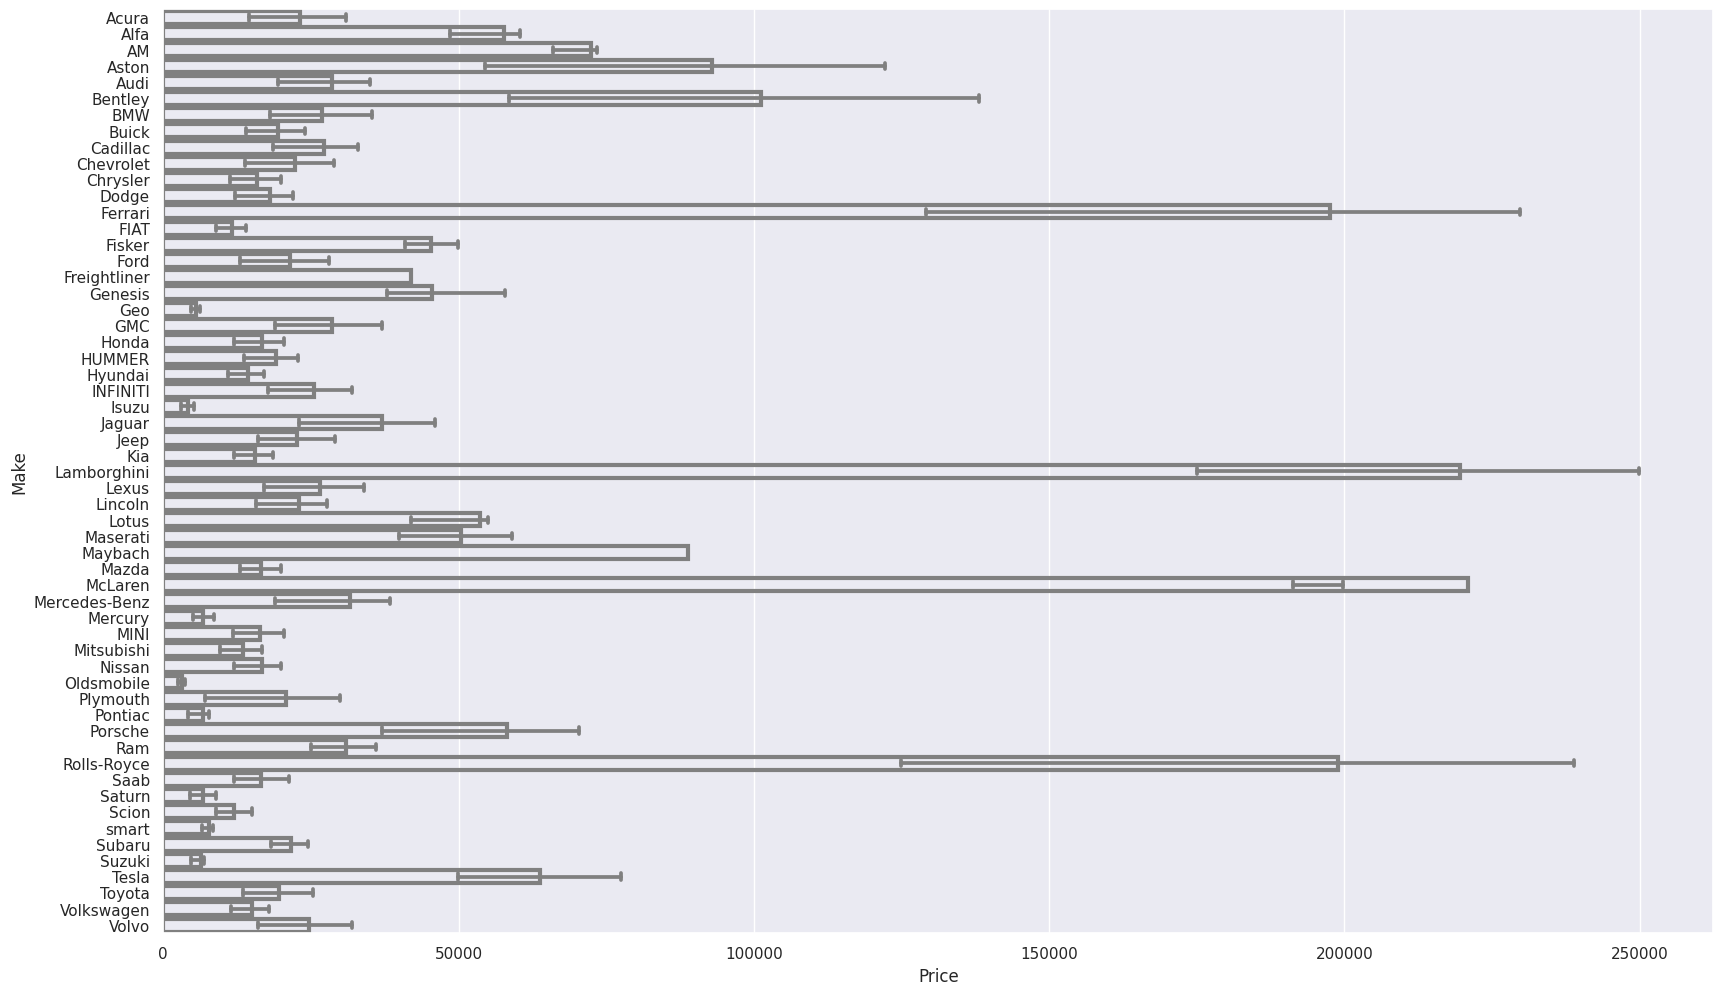

In [10]:
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

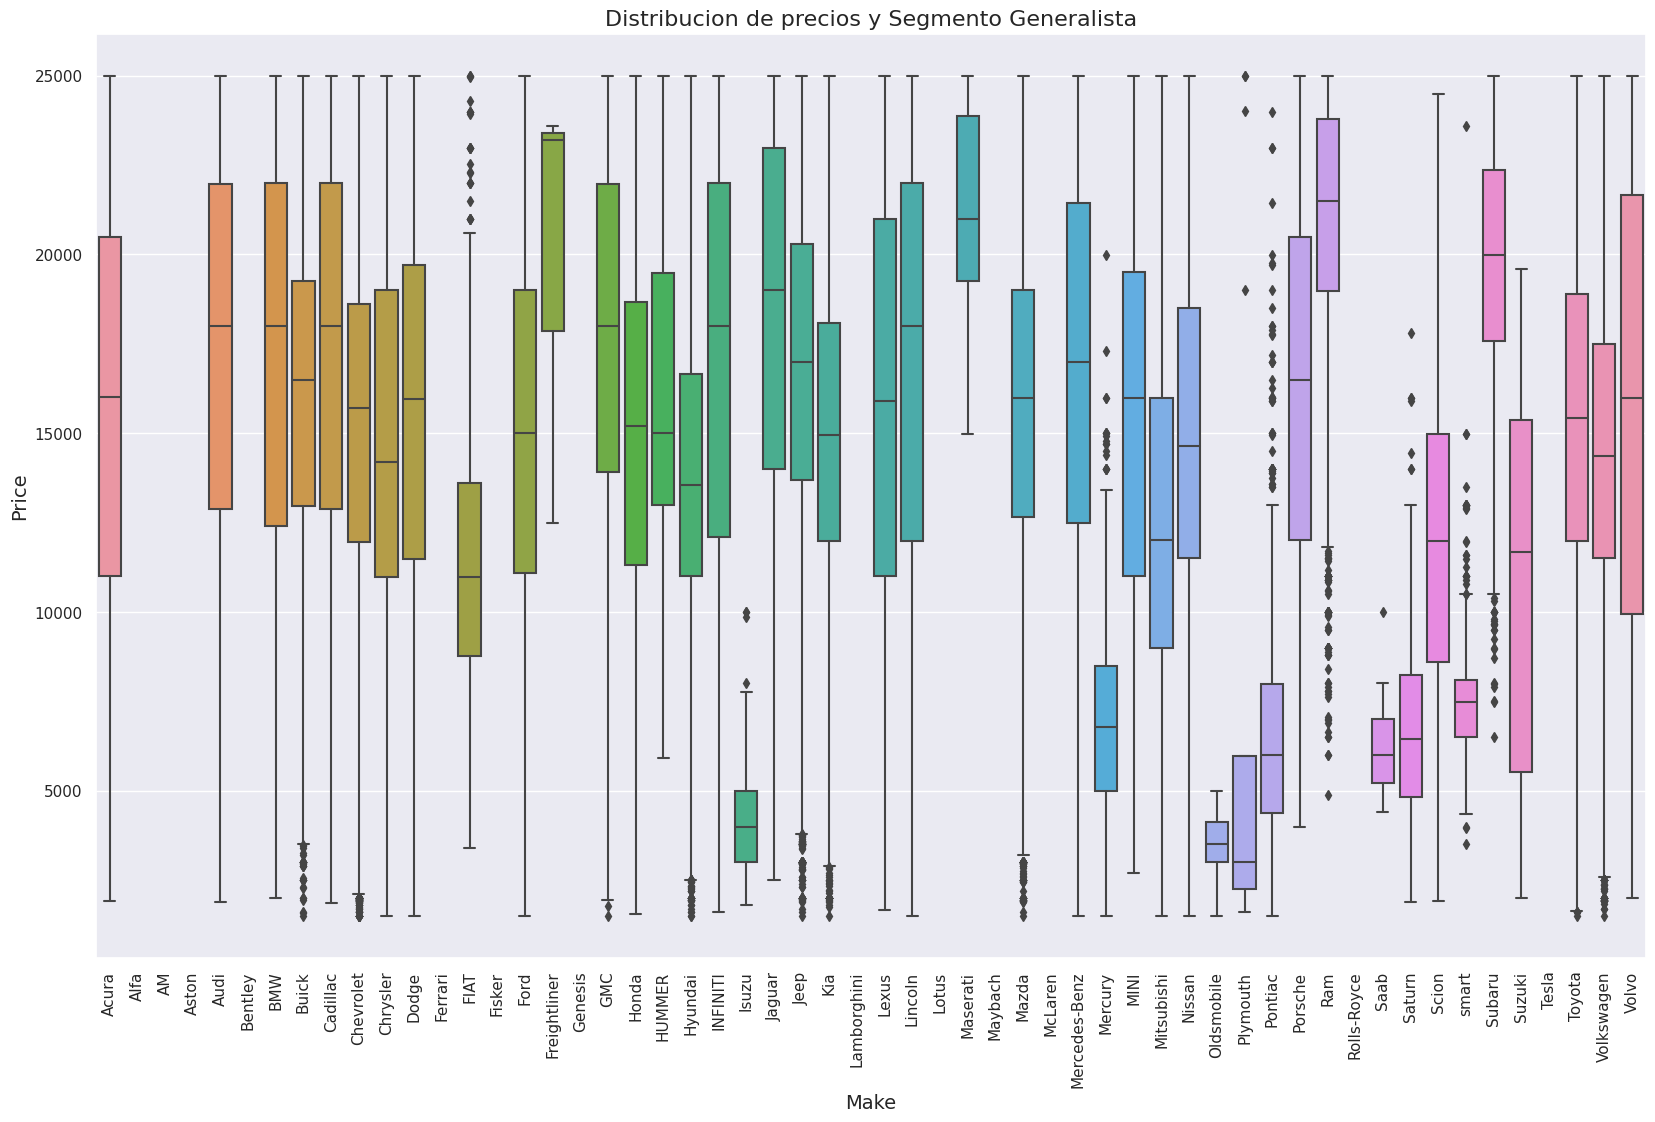

In [11]:
fx.boxplot_graph(df_train['Make'], df_train_generalista['Price'], 'Distribucion de precios y Segmento Generalista')

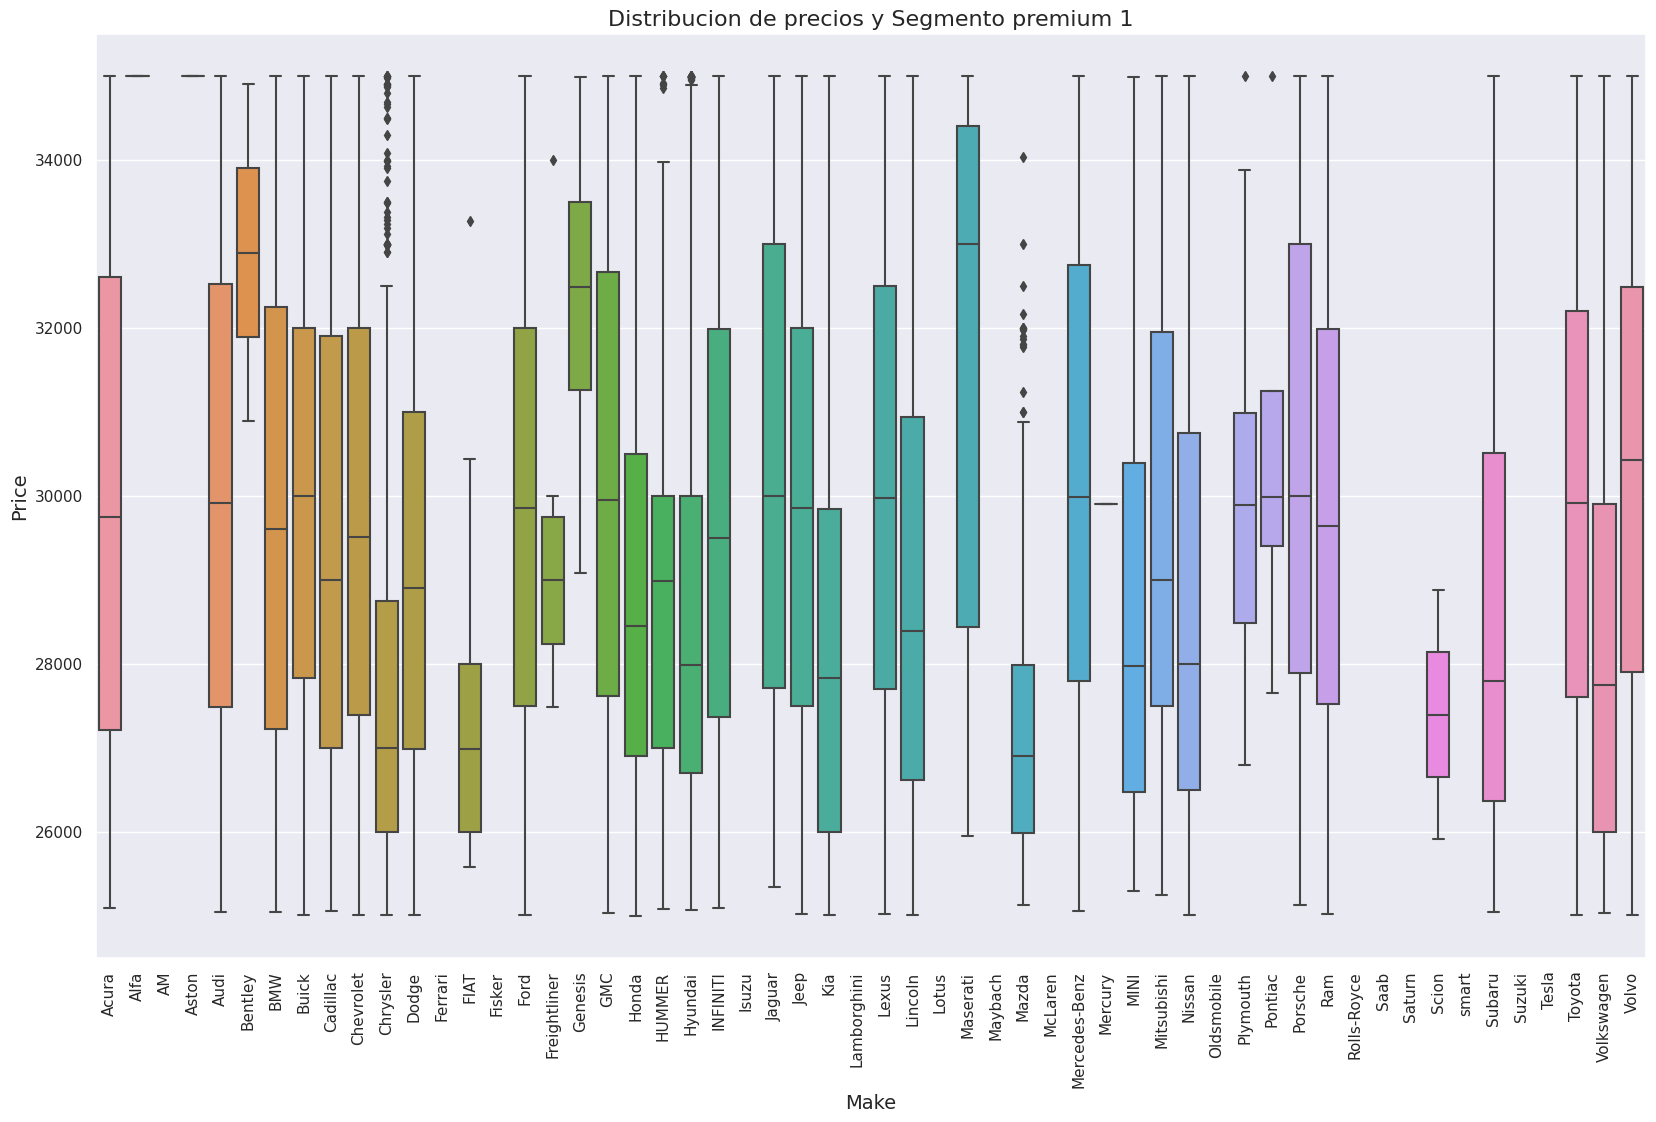

In [12]:
fx.boxplot_graph(df_train['Make'], df_train_premium1['Price'], 'Distribucion de precios y Segmento premium 1')

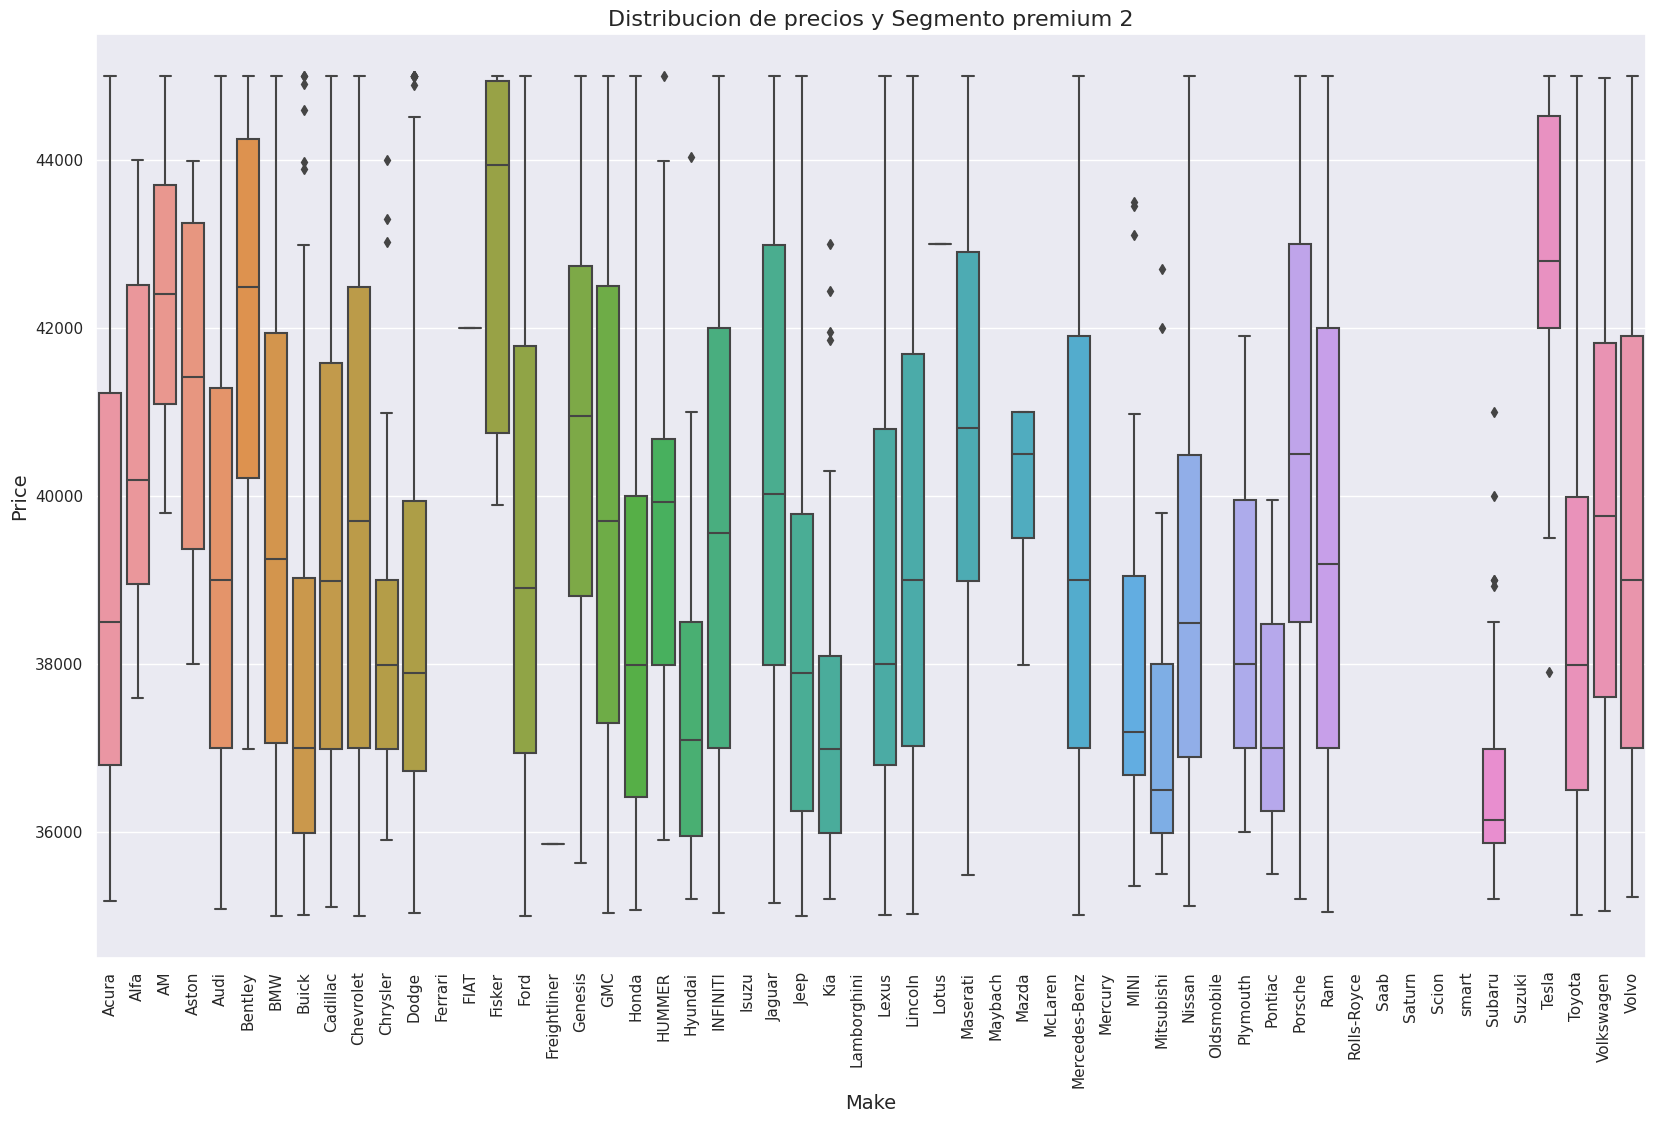

In [13]:
fx.boxplot_graph(df_train['Make'], df_train_premium2['Price'], 'Distribucion de precios y Segmento premium 2')

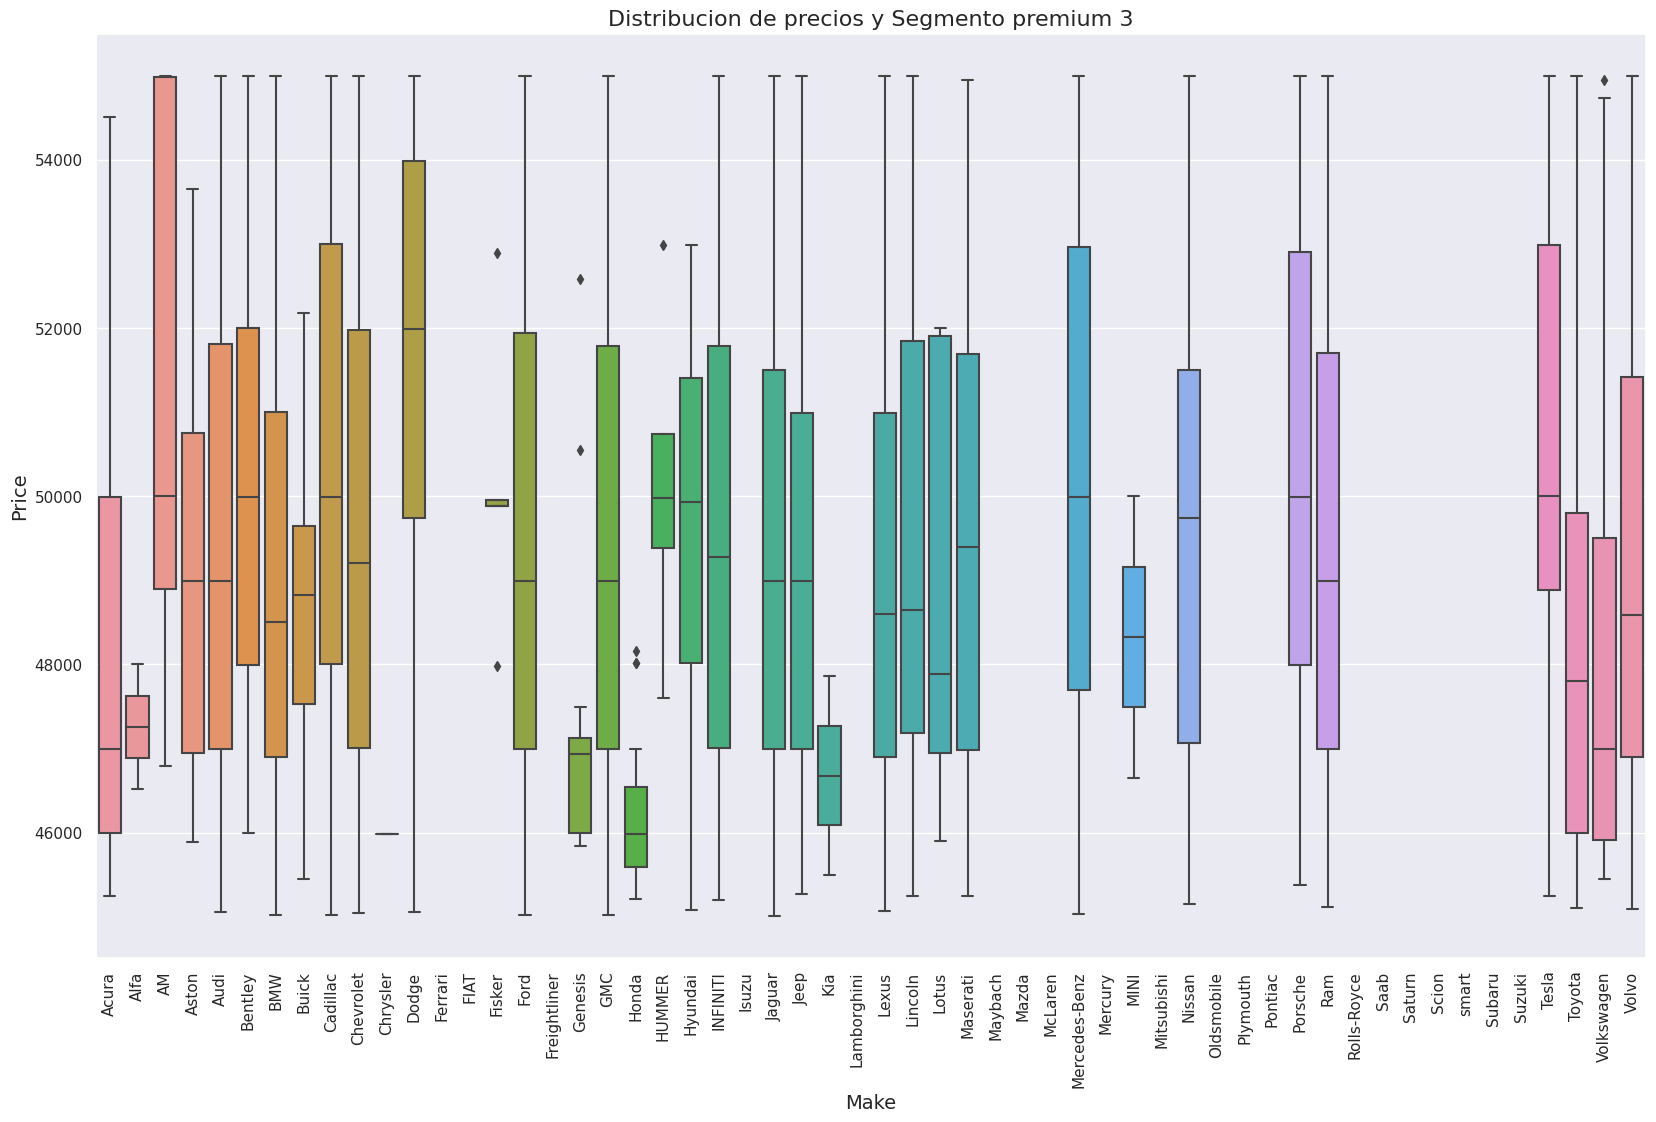

In [14]:
fx.boxplot_graph(df_train['Make'], df_train_premium3['Price'], 'Distribucion de precios y Segmento premium 3')

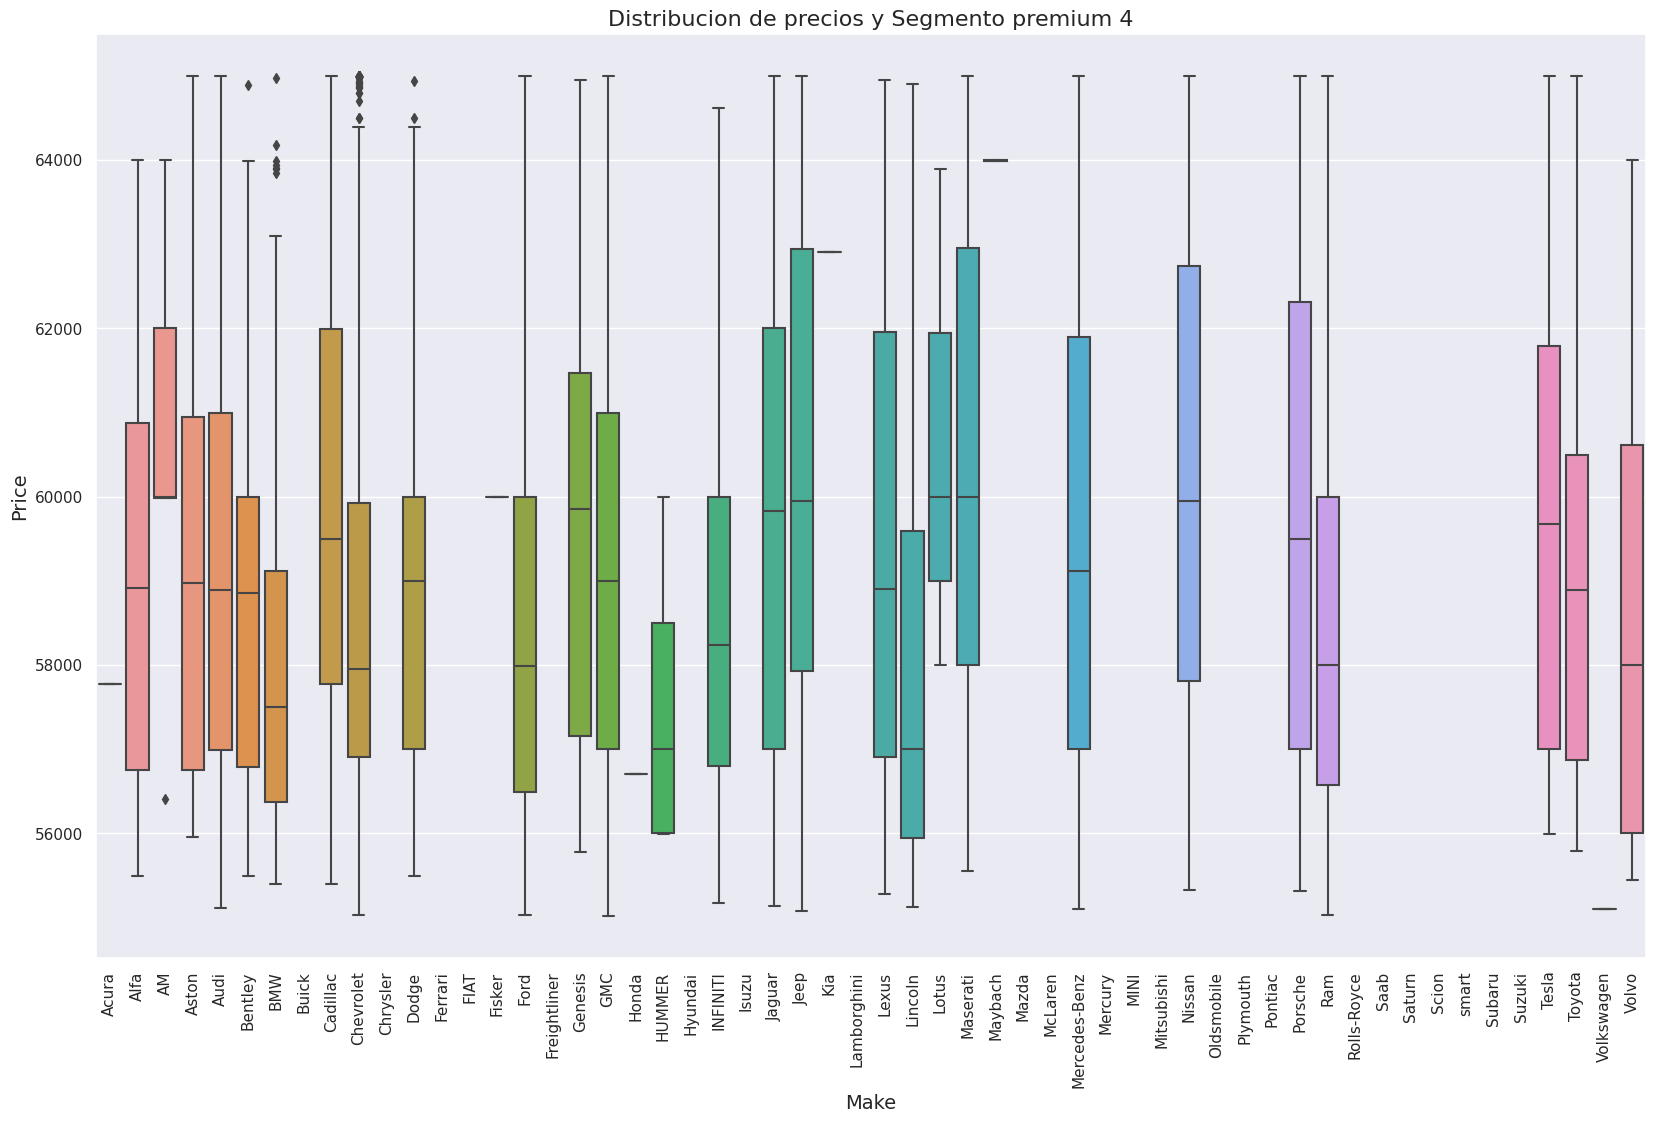

In [15]:
fx.boxplot_graph(df_train['Make'], df_train_premium4['Price'], 'Distribucion de precios y Segmento premium 4')

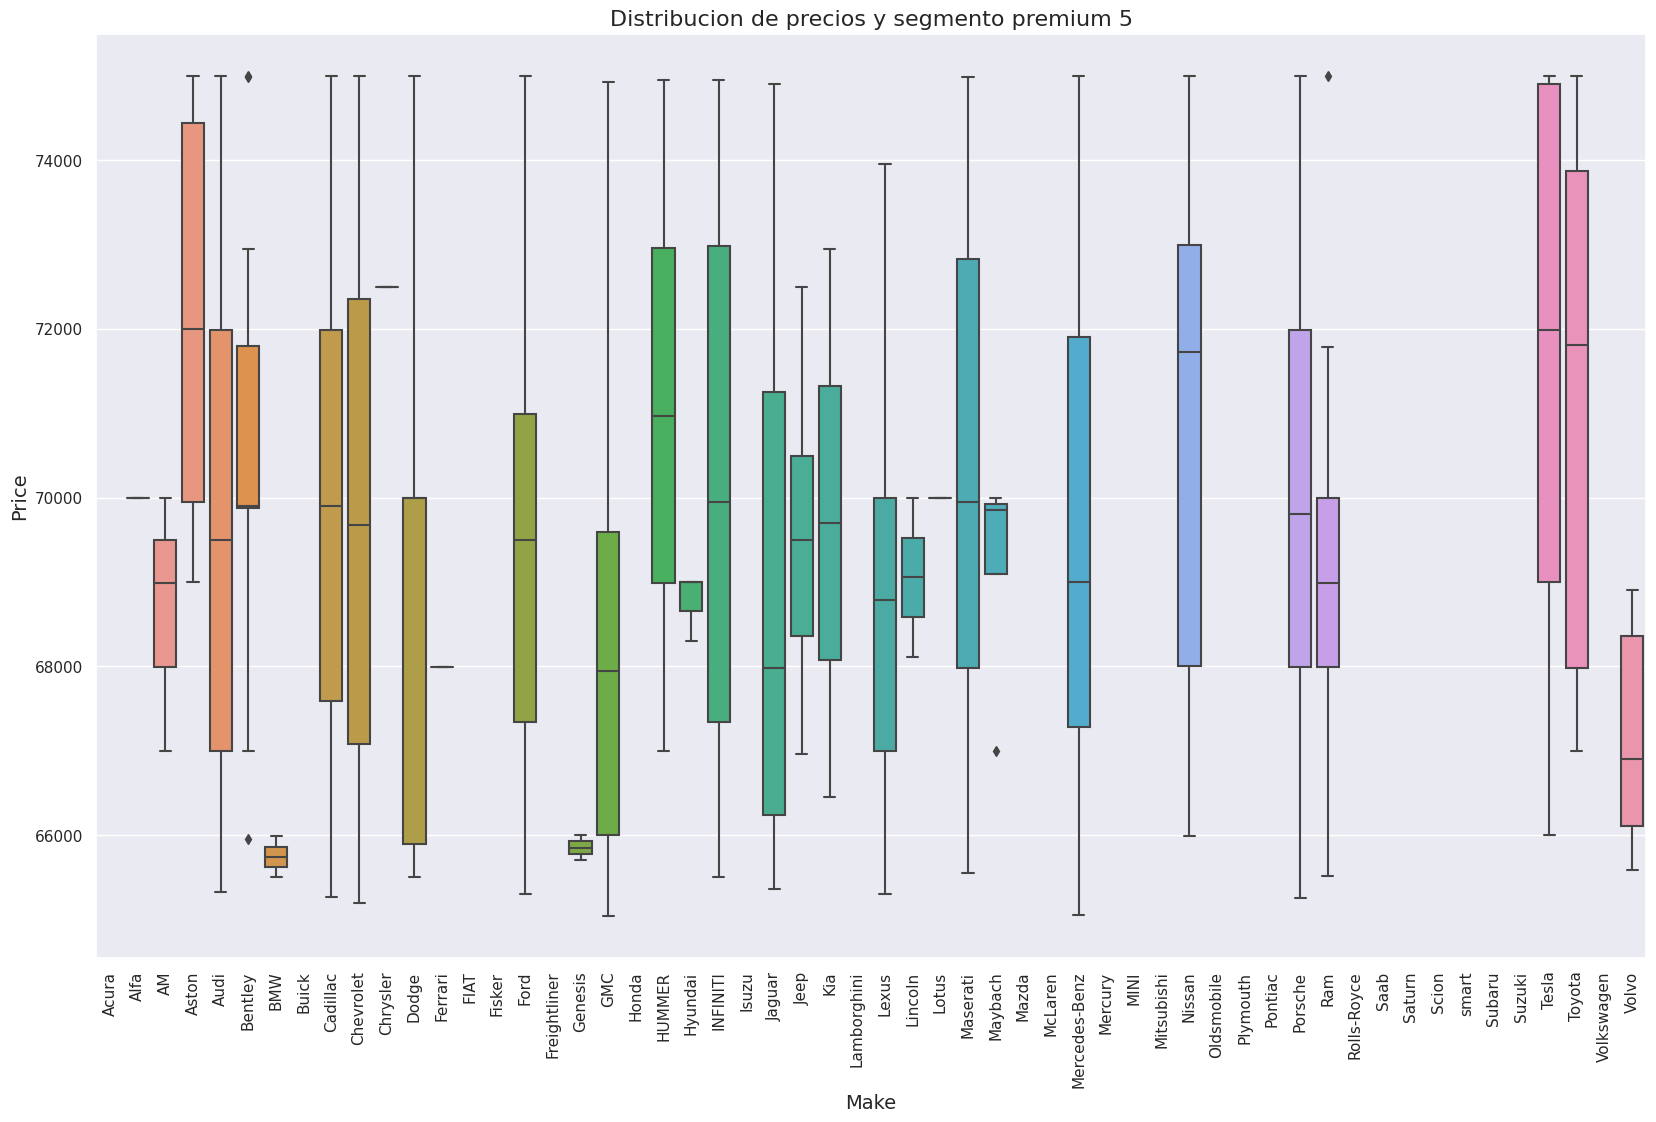

In [16]:
fx.boxplot_graph(df_train['Make'], df_train_premium5['Price'], 'Distribucion de precios y segmento premium 5')

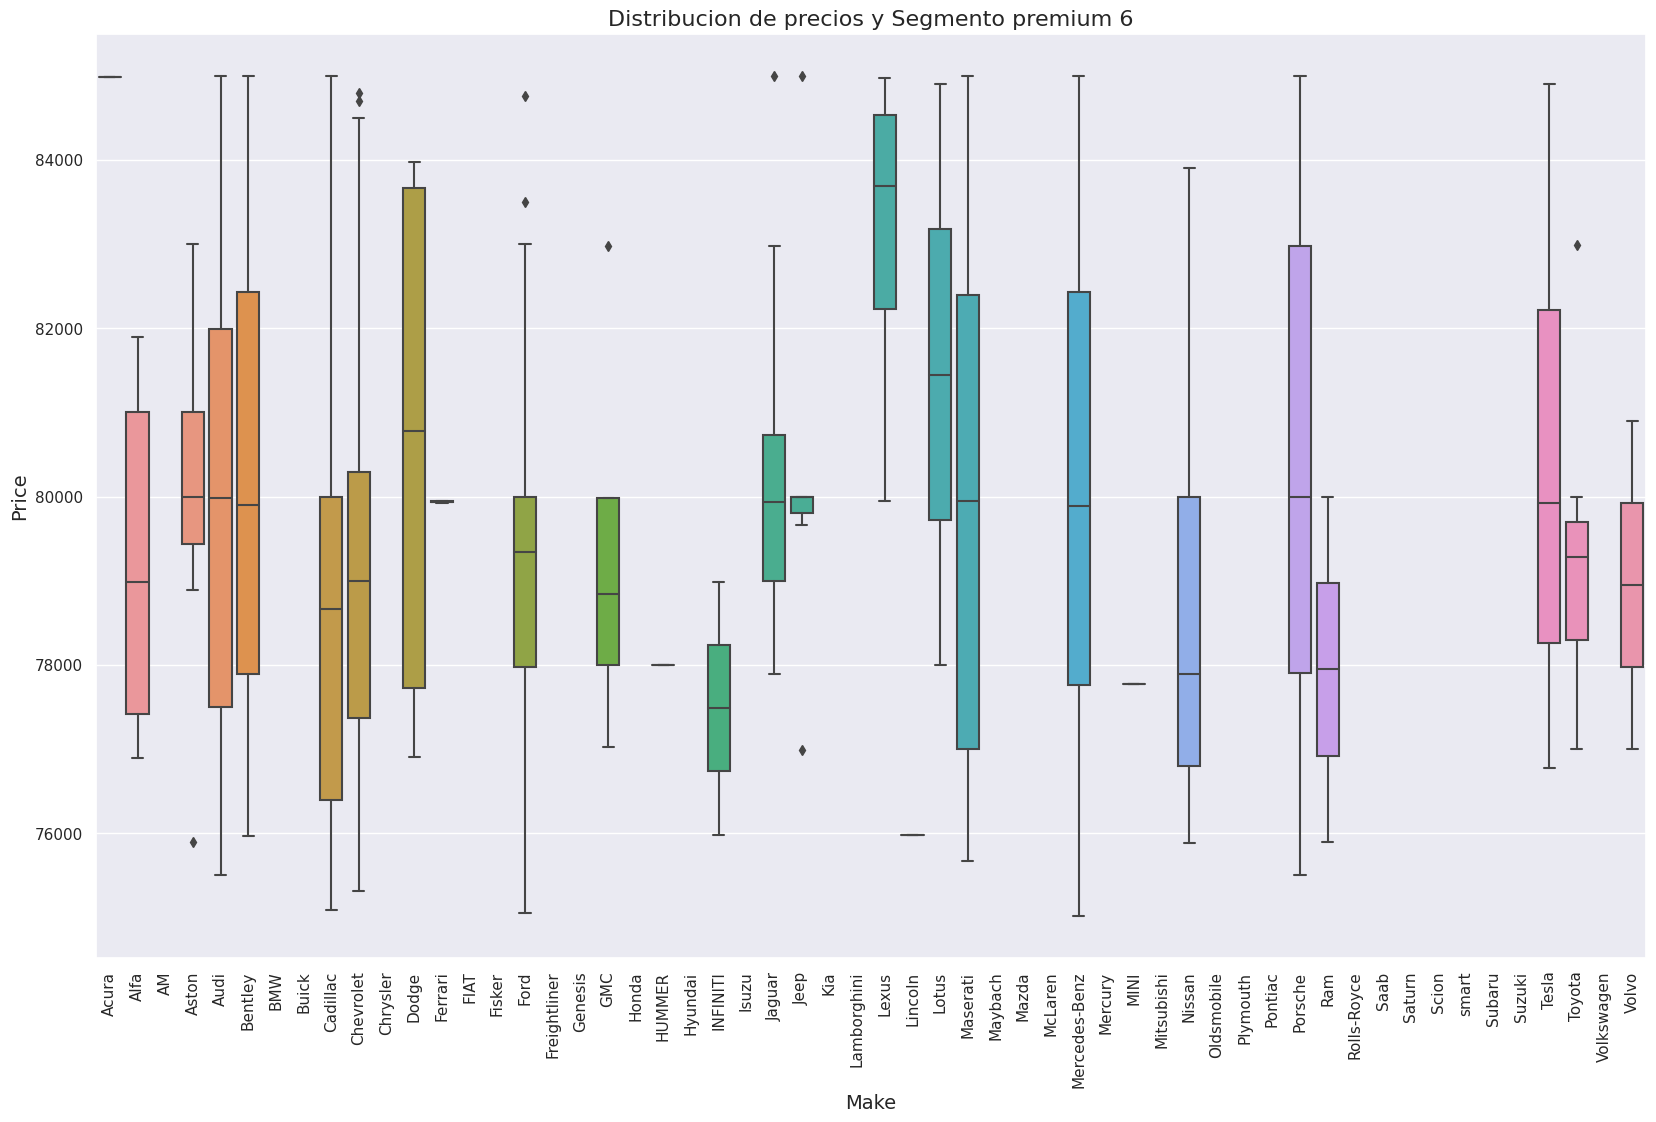

In [17]:
fx.boxplot_graph(df_train['Make'], df_train_premium6['Price'], 'Distribucion de precios y Segmento premium 6')

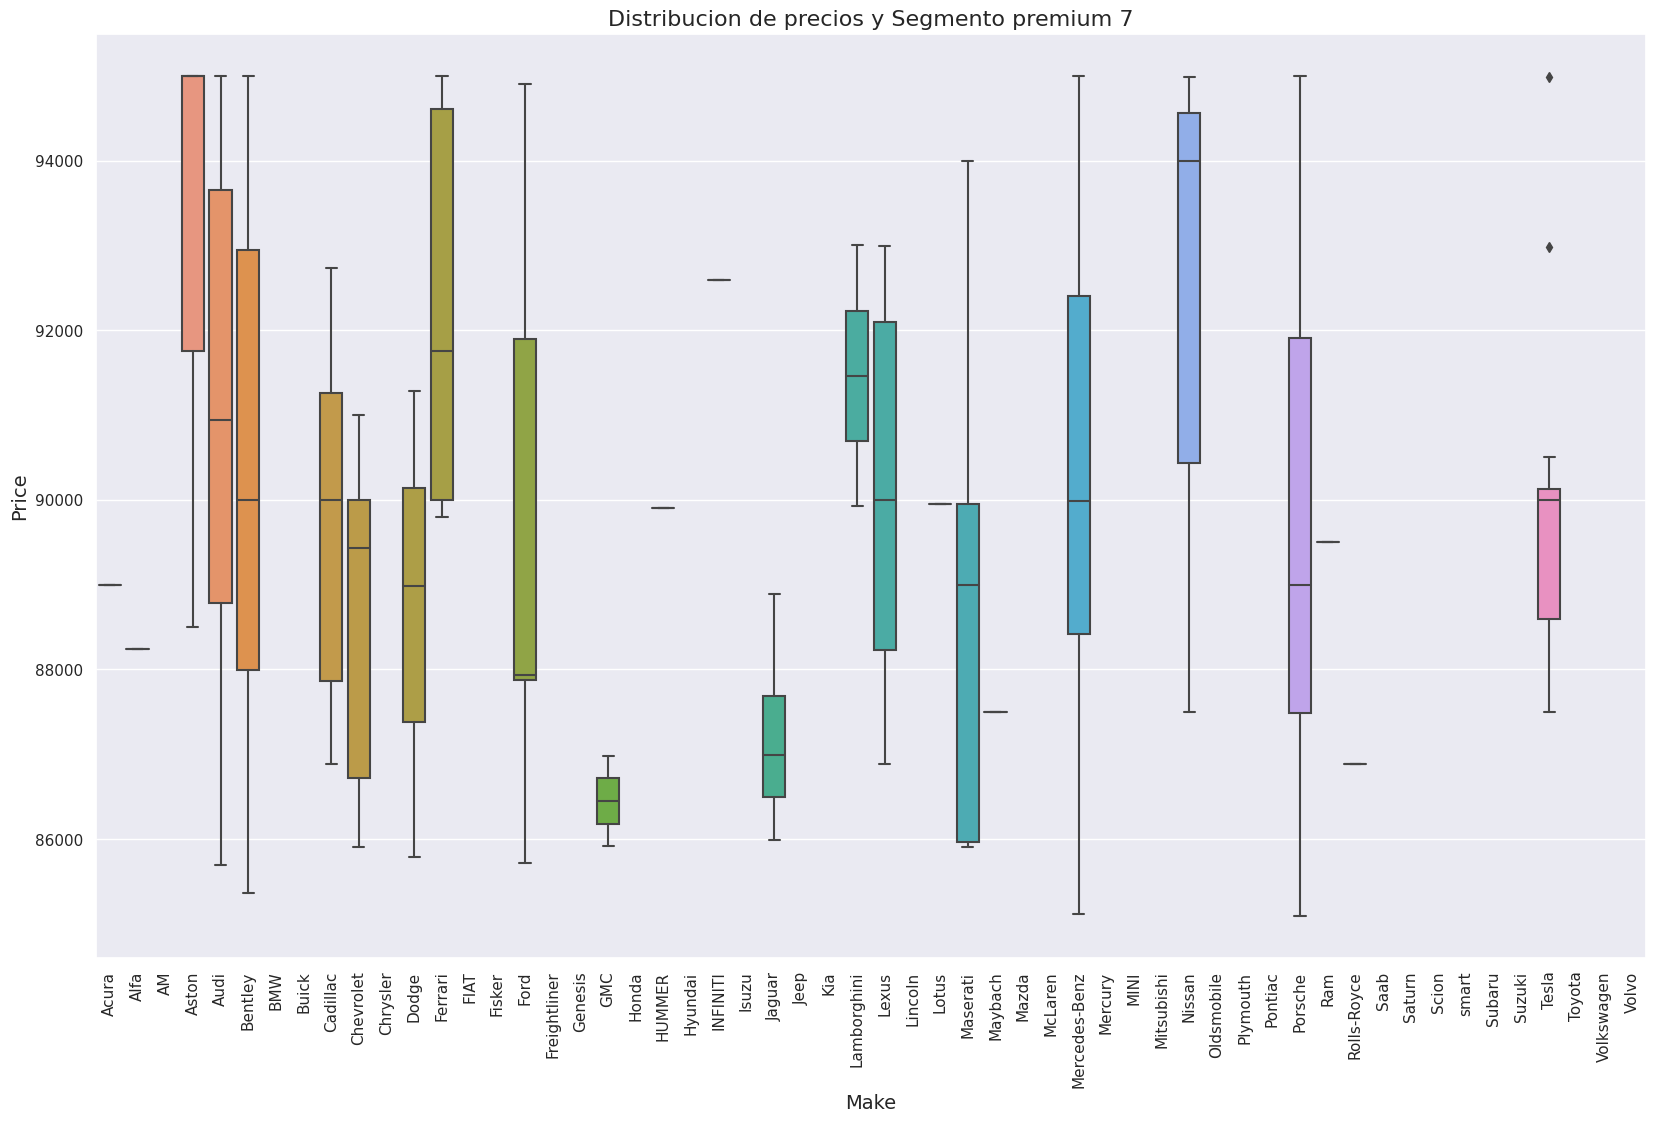

In [18]:
fx.boxplot_graph(df_train['Make'], df_train_premium7['Price'], 'Distribucion de precios y Segmento premium 7')

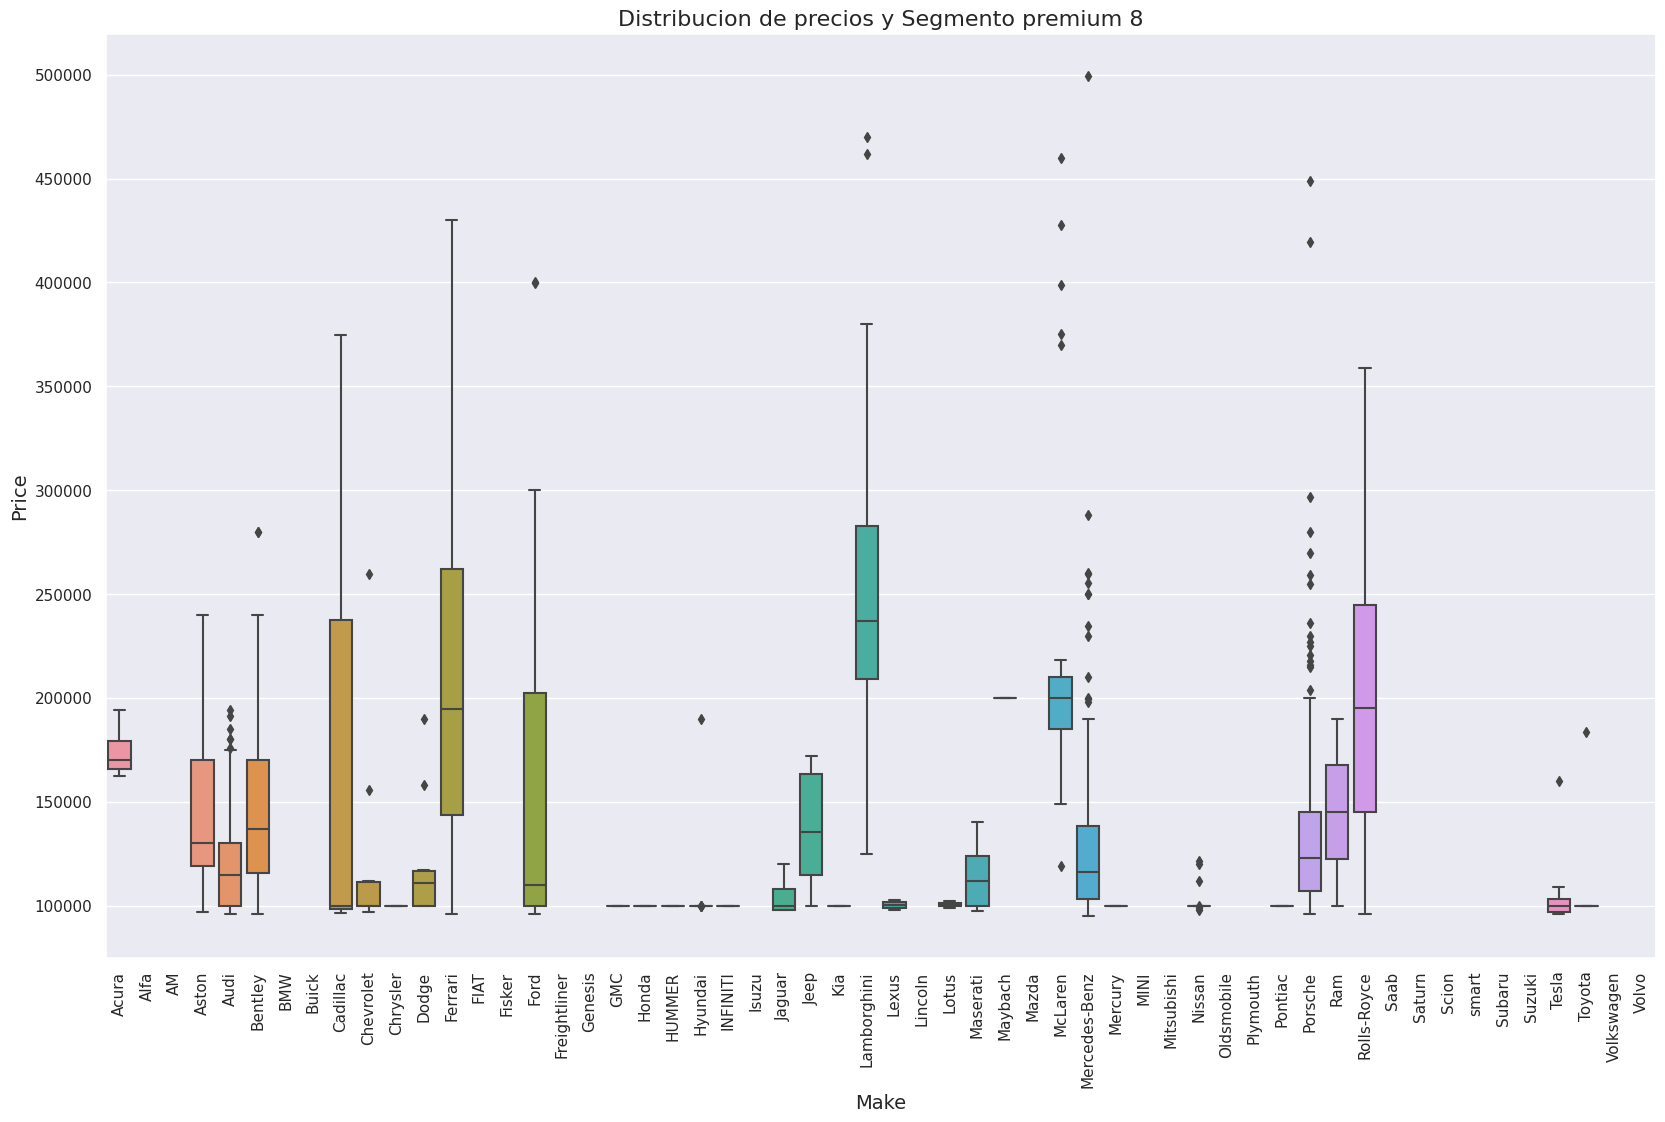

In [19]:
fx.boxplot_graph(df_train['Make'], df_train_premium8['Price'], 'Distribucion de precios y Segmento premium 8')

Los precios que estan fuera de la distribución normal se eliminaran del dataset
Método de puntuación Z para eliminar valores atípicos

In [20]:
#df_test_generalista_clean = fx.remove_outlier(df_test_generalista, 'Price', 1.5)
#df_test_generalista_clean.shape

In [21]:
# Entrenamiento para segmento generalista bajo modelo DecisionTreeRegresor
 
X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 5618.0904275623825
MAE: 3705.0
R2 Score: -0.16012871209666946


In [22]:
# Entrenamiento para segmento premium 1 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium1.drop(columns = ['Price'])
y_train_model = df_train_premium1['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_premium1.drop(columns = ['Price'])
y_test_model = df_test_premium1['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4464.804694319167
MAE: 3273.0
R2 Score: -1.4945424356881896


In [23]:
# Entrenamiento para segmento premium 2 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium2.drop(columns = ['Price'])
y_train_model = df_train_premium2['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_premium2.drop(columns = ['Price'])
y_test_model = df_test_premium2['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4283.78728781879
MAE: 2986.0
R2 Score: -1.2857963867797229


In [24]:
# Entrenamiento para segmento premium 3 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium3.drop(columns = ['Price'])
y_train_model = df_train_premium3['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)


X_test_model = df_test_premium3.drop(columns = ['Price'])
y_test_model = df_test_premium3['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4469.770177685048
MAE: 3087.5
R2 Score: -1.4725137705270441


In [25]:
# Entrenamiento para segmento premium 4 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium4.drop(columns = ['Price'])
y_train_model = df_train_premium4['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)


X_test_model = df_test_premium4.drop(columns = ['Price'])
y_test_model = df_test_premium4['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4013.3919901287786
MAE: 2555.0
R2 Score: -1.2639115464221873


In [26]:
# Entrenamiento para segmento premium 5 bajo modelo DecisionTreeRegresor


X_train_model = df_train_premium5.drop(columns = ['Price'])
y_train_model = df_train_premium5['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)


X_test_model = df_test_premium5.drop(columns = ['Price'])
y_test_model = df_test_premium5['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4172.007224933202
MAE: 2999.0
R2 Score: -1.2480264399103147


In [27]:
# Entrenamiento para segmento premium 6 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium6.drop(columns = ['Price'])
y_train_model = df_train_premium6['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_premium6.drop(columns = ['Price'])
y_test_model = df_test_premium6['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4186.690393431361
MAE: 2995.5
R2 Score: -1.2208638813420225


In [28]:
# Entrenamiento para segmento premium 7 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium7.drop(columns = ['Price'])
y_train_model = df_train_premium7['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)


X_test_model = df_test_premium7.drop(columns = ['Price'])
y_test_model = df_test_premium7['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4257.231906806738
MAE: 3022.5
R2 Score: -1.5647795820168025


In [29]:
# Entrenamiento para segmento premium 8 bajo modelo DecisionTreeRegresor

X_train_model = df_train_premium8.drop(columns = ['Price'])
y_train_model = df_train_premium8['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)


X_test_model = df_test_premium8.drop(columns = ['Price'])
y_test_model = df_test_premium8['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 57895.364871891994
MAE: 19905.0
R2 Score: 0.2771363680366168


In [30]:
# Entrenamiento para segmento generalista bajo modelo LinearRegression

X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']

clf_lr = LinearRegression().fit(X_train_model, y_train_model)

X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LinearRegression
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')


Reporte para LinearRegression
RMSE: 3448.7577854073556
MAE: 2278.4473949112
R2 Score: 0.5628262140901771


In [31]:
'''
# Entrenamiento para segmento generalista bajo modelo RandomForestRegressor

X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']

clf_lr = RandomForestRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']
'''
'''
y_hat_dt = clf_lr.predict(X_test_model)
#print(f'''#Reporte para RandomForestRegressor 
#RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
#MAE: {median_absolute_error(y_test_model, y_hat_dt)}
#R2 Score: {r2_score(y_test_model, y_hat_dt)}''')


'\ny_hat_dt = clf_lr.predict(X_test_model)\n#print(f'

In [32]:
# Entrenamiento para segmento generalista bajo modelo LogisticRegression

X_train_model = df_train_premium5.drop(columns = ['Price'])
y_train_model = df_train_premium5['Price']

clf_lr = LogisticRegression().fit(X_train_model, y_train_model)

X_test_model = df_test_premium5.drop(columns = ['Price'])
y_test_model = df_test_premium5['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LogisticRegression
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LogisticRegression
RMSE: 2787.869658929851
MAE: 2132.0
R2 Score: -0.0038209189749935923


In [33]:
# Entrenamiento para segmento generalista bajo modelo LassoCV

X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 3870.0422998785434
MAE: 2575.8492727487464
R2 Score: 0.44949641862029865


In [34]:
# Entrenamiento para segmento premium 1 bajo modelo LassoCV

X_train_model = df_train_premium1.drop(columns = ['Price'])
y_train_model = df_train_premium1['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium1.drop(columns = ['Price'])
y_test_model = df_test_premium1['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2756.3468958113303
MAE: 2269.385124545388
R2 Score: 0.0492776309327444


In [35]:
# # Entrenamiento para segmento premium 2 bajo modelo LassoCV

X_train_model = df_train_premium2.drop(columns = ['Price'])
y_train_model = df_train_premium2['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium2.drop(columns = ['Price'])
y_test_model = df_test_premium2['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2817.628027776926
MAE: 2447.4489296098473
R2 Score: 0.011107543922172392


In [36]:
# # Entrenamiento para segmento premium 3 bajo modelo LassoCV

X_train_model = df_train_premium3.drop(columns = ['Price'])
y_train_model = df_train_premium3['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium3.drop(columns = ['Price'])
y_test_model = df_test_premium3['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2842.6014400961008
MAE: 2441.7016836310067
R2 Score: -6.340131804005722e-07


In [37]:
# # Entrenamiento para segmento premium 4 bajo modelo LassoCV

X_train_model = df_train_premium4.drop(columns = ['Price'])
y_train_model = df_train_premium4['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium4.drop(columns = ['Price'])
y_test_model = df_test_premium4['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2673.2523658470914
MAE: 1954.3775579185167
R2 Score: -0.004421996426354324


In [38]:
# # Entrenamiento para segmento premium 5 bajo modelo LassoCV

X_train_model = df_train_premium5.drop(columns = ['Price'])
y_train_model = df_train_premium5['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium5.drop(columns = ['Price'])
y_test_model = df_test_premium5['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2772.7403219803527
MAE: 2191.8952263134997
R2 Score: 0.0070446792280676185


In [39]:
# # Entrenamiento para segmento premium 6 bajo modelo LassoCV

X_train_model = df_train_premium6.drop(columns = ['Price'])
y_train_model = df_train_premium6['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium6.drop(columns = ['Price'])
y_test_model = df_test_premium6['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2841.149125471068
MAE: 2315.7309811608648
R2 Score: -0.022747221100465786


In [40]:
# # Entrenamiento para segmento premium 7 bajo modelo LassoCV

X_train_model = df_train_premium7.drop(columns = ['Price'])
y_train_model = df_train_premium7['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium7.drop(columns = ['Price'])
y_test_model = df_test_premium7['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 2653.891664189207
MAE: 1721.5712473230014
R2 Score: 0.0033060742477455385


In [41]:
# # Entrenamiento para segmento premium 8 bajo modelo LassoCV

X_train_model = df_train_premium8.drop(columns = ['Price'])
y_train_model = df_train_premium8['Price']

clf_lr = LassoCV(cv=3).fit(X_train_model, y_train_model)

X_test_model = df_test_premium8.drop(columns = ['Price'])
y_test_model = df_test_premium8['Price']

y_hat_dt = clf_lr.predict(X_test_model)
print(f'''Reporte para LassoCV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para LassoCV
RMSE: 68060.67916548147
MAE: 42149.0127026237
R2 Score: 0.0010095376508378884


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [43]:
%%time
##### Busqueda de mejores parametros bajo GridSearchCV para SVC

params = {'C':[1]}

X_train_model = df_train_premium8.drop(columns = ['Price'])
y_train_model = df_train_premium8['Price']

X_test_model = df_test_premium8.drop(columns = ['Price'])
y_test_model = df_test_premium8['Price']

svc_gridcv = GridSearchCV(SVC(random_state = 1), params, cv=3, n_jobs=-1).fit(X_train_model,y_train_model)
print(f'''Los mejores hiperparametros para SVC son:
{svc_gridcv.best_params_}''')

Los mejores hiperparametros para SVC son:
{'C': 1}
CPU times: user 976 ms, sys: 423 ms, total: 1.4 s
Wall time: 3.23 s


In [44]:

y_hat_dt = svc_gridcv.predict(X_test_model)
print(f'''Reporte para CV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para CV
RMSE: 86119.03408348974
MAE: 29901.0
R2 Score: -0.599436803589706


In [45]:
X_train_model_lazy = df_train_premium8.drop(columns = ['Price'])
y_train_model_lazy = df_train_premium8['Price']

X_test_model_lazy = df_test_premium8.drop(columns = ['Price'])
y_test_model_lazy = df_test_premium8['Price']

In [46]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train_model_lazy, X_test_model_lazy, y_train_model_lazy, y_test_model_lazy)

100%|██████████| 42/42 [01:15<00:00,  1.79s/it]


In [47]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.43,0.45,50472.73,0.29
GradientBoostingRegressor,0.42,0.44,51105.71,0.22
RandomForestRegressor,0.41,0.43,51453.67,0.57
AdaBoostRegressor,0.39,0.41,52502.21,0.10
HistGradientBoostingRegressor,0.36,0.38,53507.28,0.66
KNeighborsRegressor,0.34,0.36,54415.90,0.03
LGBMRegressor,0.34,0.36,54511.68,0.14
BaggingRegressor,0.34,0.36,54686.07,0.06
XGBRegressor,0.21,0.23,59605.83,0.20


In [67]:
def report_metrics(model, x_test, y_test):
        preds = model.predict(x_test)
        print(f'''
        Test R2: {r2_score(y_test, preds)}
        Test MSE: {mean_squared_error(y_test, preds)}
        Test Median Absolute Error: {median_absolute_error(y_test, preds)}''')

In [52]:
X_train_model_gb = df_train_premium8.drop(columns = ['Price'])
y_train_model_gb = df_train_premium8['Price']

X_test_model_gb = df_test_premium8.drop(columns = ['Price'])
y_test_model_gb = df_test_premium8['Price']

reg = GradientBoostingRegressor().fit(X_train_model_gb, y_train_model_gb)
'''GradientBoostingRegressor(random_state=0)
reg.predict(X_test_model_lazy[1:2])
reg.score(X_test_model_lazy, y_test_model_lazy)'''

'GradientBoostingRegressor(random_state=0)\nreg.predict(X_test_model_lazy[1:2])\nreg.score(X_test_model_lazy, y_test_model_lazy)'

In [53]:
y_hat_gbr = reg.predict(X_test_model_gb)
print(f'''Reporte para GBR
RMSE: {np.sqrt(mean_squared_error(y_test_model_gb, y_hat_gbr))}
MAE: {median_absolute_error(y_test_model_gb, y_hat_gbr)}
R2 Score: {r2_score(y_test_model_gb, y_hat_gbr)}''')

Reporte para GBR
RMSE: 50208.59936803595
MAE: 15587.232233592367
R2 Score: 0.45634298337498513


In [54]:
X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']


X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']



reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_model, y_train_model)
GradientBoostingRegressor(random_state=0)
reg.predict(X_test_model[1:2])
reg.score(X_test_model, y_test_model)

0.6249099411081548

In [55]:
y_hat_gbr = reg.predict(X_test_model)
print(f'''Reporte para GBR
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_gbr))}
MAE: {median_absolute_error(y_test_model, y_hat_gbr)}
R2 Score: {r2_score(y_test_model, y_hat_gbr)}''')

Reporte para GBR
RMSE: 3194.503840751596
MAE: 2050.240509571675
R2 Score: 0.6249099411081548
